# Fashion MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
len(train_images)

60000

In [4]:
len(test_images)

10000

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

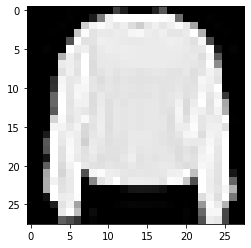

In [14]:
plt.imshow(train_images[7], cmap = "gray")
plt.show()

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
print(len(train_labels))
print(train_labels[:5])

60000
[9 0 0 3 0]


In [18]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

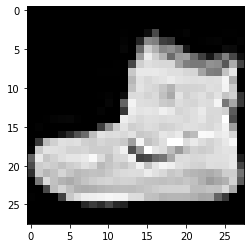

In [19]:
plt.imshow(train_images[0], cmap = 'gray')
plt.show()

In [20]:
[np.max(train_images), np.min(train_images)]

[255, 0]

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(10,  activation = "softmax")
])
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.get_weights()

[array([[ 0.00536131, -0.05647285,  0.03693513, ..., -0.05312072,
          0.07834355,  0.08056461],
        [-0.02642062,  0.08003075,  0.00916773, ...,  0.07116241,
         -0.05461153, -0.02420859],
        [-0.08046487,  0.05045084, -0.01076403, ..., -0.00225697,
          0.0501228 ,  0.05474512],
        ...,
        [ 0.03900121,  0.06141687, -0.02553768, ..., -0.04387758,
         -0.00515648, -0.07898044],
        [ 0.0330157 , -0.08051608,  0.00288765, ..., -0.06509496,
          0.02261315, -0.02607124],
        [-0.04565533,  0.01724388, -0.06652145, ...,  0.07898802,
         -0.06680714, -0.05287001]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
# !pip install pydot --user
# !pip install graphviz --user

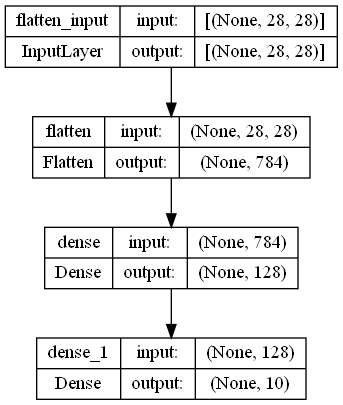

In [24]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [25]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4943 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3728 - accuracy: 0.8667
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3366 - accuracy: 0.8779
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3103 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2940 - accuracy: 0.8918


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
str(round(test_acc * 100, 1)) + "%"

313/313 [==============================] - 1s 935us/step - loss: 0.3480 - accuracy: 0.8720


'87.2%'

In [27]:
test_images.shape

(10000, 28, 28)

In [34]:
test_images[:1].shape

(1, 28, 28)

In [35]:
test_images[0].shape

(28, 28)

In [33]:
model.predict(test_images[:1])

1/1 [==============================] - 0s 30ms/step


array([[9.68292966e-07, 5.37280940e-08, 1.08699155e-07, 1.15058072e-06,
        1.69454711e-06, 6.25890493e-03, 3.14351678e-06, 3.32958996e-02,
        1.38232921e-04, 9.60299850e-01]], dtype=float32)

In [29]:
pred = model.predict(test_images)
print(pred[1])

313/313 [==============================] - 0s 779us/step
[1.5889930e-04 1.4167630e-09 9.8990625e-01 1.1799836e-08 3.0120867e-03
 9.0363050e-11 6.9228625e-03 8.3082358e-14 4.6380411e-08 2.3861523e-12]


In [36]:
pred.shape

(10000, 10)

In [37]:
print(pred[1].round(3))

[0.    0.    0.99  0.    0.003 0.    0.007 0.    0.    0.   ]


In [38]:
np.argmax(pred[1])

2

In [39]:
plt.figure()
plt.imshow(test_images[1], cmap = 'gray')
plt.title(class_names[np.argmax(pred[1])])
plt.show()

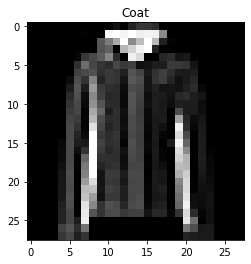

In [76]:
test_num = 6
plt.imshow(test_images[test_num], cmap = 'gray')
plt.title(class_names[np.argmax(pred[test_num])])
plt.show()

In [53]:
import cv2
img = cv2.imread("nike_shoes.jpg", cv2.IMREAD_GRAYSCALE)

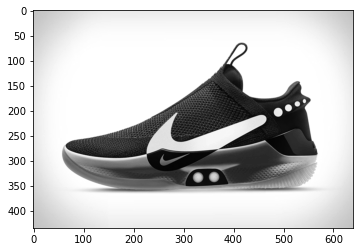

In [54]:
plt.imshow(img, cmap = 'gray')
plt.show()

In [55]:
img.shape

(435, 640)

In [56]:
img_reshaped = cv2.resize(img, (28, 28))
plt.imshow(img_reshaped, cmap = 'gray')
plt.show()

In [57]:
img_reshaped = img_reshaped / 255.0
print([np.max(img_reshaped), np.min(img_reshaped)])

[1.0, 0.0196078431372549]


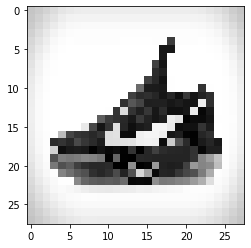

In [58]:
plt.imshow(img_reshaped, cmap = 'gray')
plt.show()

In [59]:
img_reshaped[img_reshaped > 0.75] = 1
print([np.max(img_reshaped), np.min(img_reshaped)])

[1.0, 0.0196078431372549]


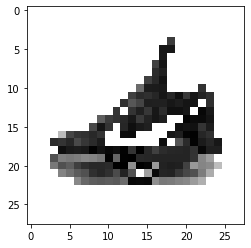

In [60]:
plt.imshow(img_reshaped, cmap = 'gray')
plt.show()

In [61]:
img_reshaped = 1 - img_reshaped
plt.imshow(img_reshaped, cmap = 'gray')
plt.show()

In [62]:
my_test = np.array([img_reshaped])
my_lable = [7]

In [63]:
my_test[0][:3, :3]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [64]:
print(model.predict(my_test))
print(model.predict(my_test).round(3))

1/1 [==============================] - 0s 26ms/step
[[1.4224075e-05 8.2949628e-06 4.7943918e-06 2.7031117e-04 5.0434039e-04
  7.1114486e-01 1.9732963e-05 2.2885783e-01 5.8944751e-02 2.3089131e-04]]
1/1 [==============================] - 0s 23ms/step
[[0.    0.    0.    0.    0.001 0.711 0.    0.229 0.059 0.   ]]


In [65]:
np.argmax(model.predict(my_test))

1/1 [==============================] - 0s 16ms/step


5

In [66]:
class_names[7]

'Sneaker'

In [67]:
class_names[5]

'Sandal'

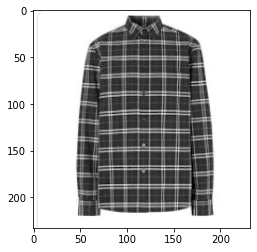

In [69]:
img = cv2.imread("shirt.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray')
plt.show()

In [70]:
img_reshaped = cv2.resize(img, (28, 28))
plt.imshow(img_reshaped, cmap = 'gray')
plt.show()

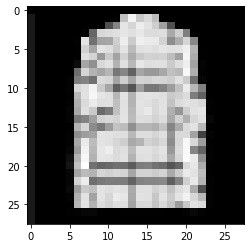

In [71]:
img_reshaped = img_reshaped / 255.0
img_reshaped = 1 - img_reshaped
plt.imshow(img_reshaped, cmap = 'gray')
plt.show()

In [72]:
my_test = np.array([img_reshaped])
print(model.predict(my_test).round(3))

1/1 [==============================] - 0s 17ms/step
[[0.008 0.001 0.22  0.01  0.327 0.    0.398 0.    0.036 0.   ]]


In [73]:
model.predict(my_test).argmax()

1/1 [==============================] - 0s 15ms/step


6